PREDICTING HOUSING PRICES OF BOSTON DATASET 
=======================

In this project we will explore the power of a predictive model that has been trained and tested over the boston housing data set that has been taken from [UCI](https://archive.ics.uci.edu/ml/datasets.html) repository. 

The BOSTON dataset contains 506 entries each having 14 features. At the initial stage of the project, I have identified 4 features that would be required for predicting prices of the houses. Rest other features are not relevant thus has been dropped. Also 16 entries have missing values and has been dropped too. Thus our final datset contains 490 points having 4 features each.

The 4 features selected are as follows:

1. RM : average number of rooms in the neighbourhood
2. LSTAT : percentage of homeowners being considered having low income
3. PTRATIO : pupil- teacher ratio in the neighbourhood
4. MEDV : the median sale values of the houses in the neighbourhood

So the last feature 'MEDV' is our 'y' variable. The other three features would be used as the features for X variable.

**An initial initution suggests that if the number of rooms (RM) is high , if the percentage value of people having low income (LSTAT value) is low and if the PTRATIO is low (as less PTRATIO means better economic situation in that neighbourhood) then the MEDV value should be high.**

So we will start developing the model. But before devoloping a model we have to define a performance metric.

Since it is an regression analysis project , we would use the coefficient of determination or $R^2$ to determeine the effectiveness of the model. $R^2$ actaully tells us how good is this model at making predictons.

The value of $R^2$ actually determines the percentage of correlation between the actual and precited values of the target variable. So if $R^2$ values is close to 1 then it perfectly predicts the target variable and if it is close to 0 then it fails to predict the target variable

We will use r2_score from sklern.metrics to build our performance metric function.

DETERMINING A PERFORMANCE METRIC
======================




In [2]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    '''it calculates and returns a perfromance metric score'''
    
    #calculates the r2 score between actual and predicted values
    score = r2_score(y_true, y_predict)
    
    # Returns the score
    return score

LOADING THE DATASET
===============

The dataset is loaded from the file 'housing.csv' and is divided into 'prices' and 'features' variable. 'prices' being the X variable and 'features' being the y variable.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print("The dataset is having {} points with {} features each".format(*data.shape))

The dataset is having 489 points with 4 features each


INITIAL STATISTICS OF THE DATASET
==================

These statistics are importatnt to analyse the prediction results from the constructed model. We will store this statistics into the corresponding variables.



Statistics for Boston housing dataset:

Minimum price:$ 105,000.00
Maximum price:$1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices:$165,171.13


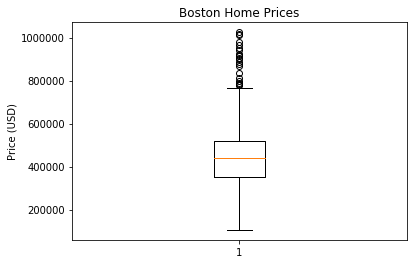

In [20]:
#Minimum price of the data
minimum_price = np.min(prices)

#Maximum price of the data
maximum_price = np.max(prices)

#Mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price:$ {:,.2f}" .format(minimum_price))
print("Maximum price:${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices:${:,.2f}".format(std_price))


# Boxplot of prices to get a sense of the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Boston Home Prices")
plt.ylabel("Price (USD)")
plt.boxplot(prices)
plt.show()

SHUFFLE AND SPLIT DATA
=================

We would now split the data into training and testing data and we would use train_test_split from sklearn.cross_validation for the same. The dataset is splitted into 80% training and 20% testing.

We assign the training and testing splits into X_train , X_test , y_train and y_test respectively.



In [23]:
from sklearn.cross_validation import train_test_split

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=7)

print("Training and testing split was successful.")
print("Training dataset size :" , X_train.shape , y_train.shape)
print("Testing dataset size :" , X_test.shape , y_test.shape)

Training and testing split was successful.
Training dataset size : (391, 3) (391,)
Testing dataset size : (98, 3) (98,)


BUILDING UP A MODEL AND ANALYSING PERFORMANCE
=========================

We will use a decision tree regressor object to build up our model . This Decision tree regressor has a parameter 'max_depth' which we will vary to see which 'max_depth' gives the optimal performance. The model is tested for various depth of the decisoon tree. Here we take 4 max_depth as 1,3,6,and 10. For each max_depth a visualisation graph is being plotted to check for score ($R^2$) of the model. This score is tested for both training and testing sets.

So let us first build up a function to determine the score and build up a visualisation graph.




In [29]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

def ModelLearning(X,y):
    
    '''calculate the performance of the model of both training and testing dataset by varying thier sizes'''
    
    # Create 10 cross-validation sets for training and testing
    '''It will create a  10 cross validation sets. Basically the dataset is divided into 10 parts 
    \ with each part acts a validation set during the training and then thier final score of 10 sets are averaged'''
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)
    
    #create the training set sizes by increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    '''So basically linespace divides X into 9 equal parts i.e values between 1 and 480 
    \ is divided into 9 parts for training. rint rounds element to the nearest integer 
    \ and the final values are type casted into integers'''
    
    #Creating the figure window
    fig = pl.figure(figsize=(10,7))
    
    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        '''Here k will get values as 0,1,2,3 and depth will get values as 1,3,6,10 every iteration'''
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)
        '''calling up the decision tree regressor model'''
        
        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
                                                                 cv = cv, train_sizes = train_sizes, scoring = 'r2')
        '''sizes gives the number of examples used for generating the training curve
        \ train_scores gives the training score 
        \ test_scores gives the testing scores
        \ here R2 SCORE has been used'''
        
        
        # Find the mean and standard deviation
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

    

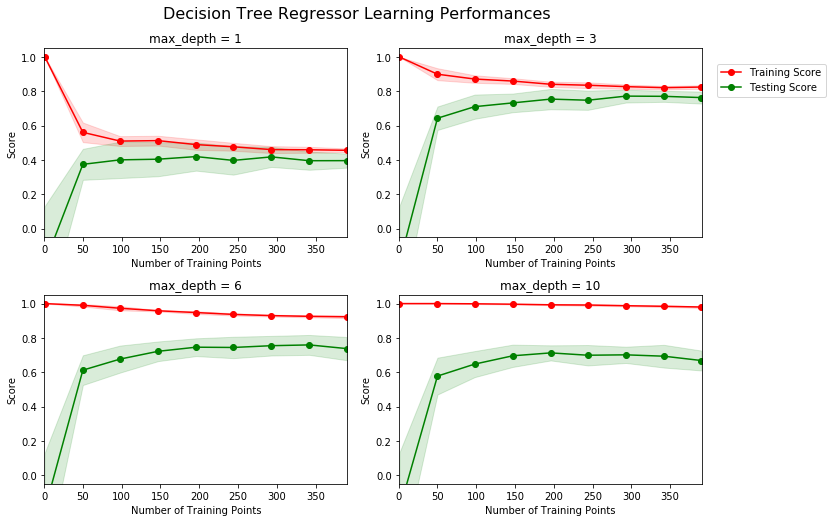

In [31]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

The four figures actually suggest that the model with max_depth=3 has better $R^2$ score than all other max_depth models. The training and testing scores have $R^2$ values in an around 0.8 which actually shows that it can actually predict ~80% of the predicted scores. However we also need to check for model's complexity curves with respect to various depths.

So we build another function called model_complexity to check the scores of training and validation data at various max_depths



In [32]:
def ModelComplexity(X, y):
    '''calculates the performance of the model with respect to various max_depths'''
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

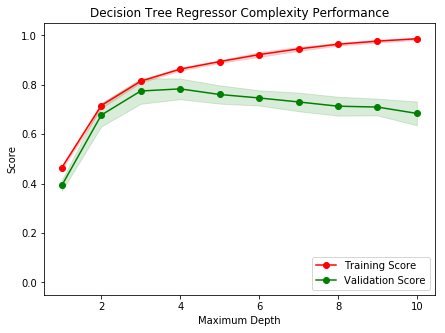

In [33]:
ModelComplexity(X_train, y_train)

The figure above actually shows that the best max_depth score should be 3. The intution is as follows:

For max_depth< 2 the training and testing score is low. This actually signifies that the  model is having high bias and is underfit. The model is not able to predict properly.Thus the $r^2$ is low.

For max_depth =10 the training and validation score are far apart. Even if the $R^2$ of the training set is high , yet the validation set's $R^2$ values is low which actually signifies that the model is not able to generalise well. Thus the model has high variance.

The best model will be the one whose generalisation capability would be very good.In this case the model with max_depth=3 gives the best choice for training and validation score.



FITTING A MODEL
===============
Now, sklearn has a grid search capability to find the best model according to the hyperparameters that we select.

We will now create a function called fit_model where we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree regressor.

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    '''performs grid search over X,y to find the best model'''
    
    #Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    #Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    #Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    #Return the optimal model after fitting the data
    return grid.best_estimator_

In [53]:
#Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

#Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 4 for the optimal model


Now our model has the capabilty to predict the unknown data. Now we have an unknown data from 3 clients and the data is as follows:

|Features|Client-1|Client-2|Client-3|
|:------:|:------:|:------:|:------:|
|RM      |  5     |    4   |    8   |
|LSTAT   |  15    |    28  |    5   |
|PTRATIO |  15    |    22  |    12  |


Let us predict the the price using out best fit model.



In [54]:
#client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

#creating an empty list
client_prices = []

#The predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    client_prices.append(price)

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


Let us print the initial statistics again.


In [55]:
# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))



Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


This shows that our predicted model is well under the minimum and maximum price bracket.

But an optimal model is not necessarily a robust model. We build a function Predict_trials that checks for 10 different types of training data and predicts if the client 1 data housing pricing model is optimal

In [57]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [58]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


If we look at the percentage variation it's about +/- 8.4% which isn't that much. Data collected in an urban city like Boston would not be applicable in a rural city. So the predictions in this model should not be used in other cities. 

In [65]:
69044.61/(2*410000.0) # Rough calculations


0.08420074390243902